<div style="border:solid black 2px; padding: 20px">
<b>Павел, привет!</b>

Меня зовут Полина Бережная, и я буду делать ревью проекта по машинному обучению. Давай будем общаться на «ты». Но если тебе комфортнее на «вы», обязательно сообщи мне об этом. 

Твой проект просто 🔥🔥🔥. Видно, что ты уверенно кодишь и понимаешь базу машинного обучения. Мне было очень приятно читать твои лаконичные и информативные выводы. Я не нашла никаких недочетов. Ты большой умница!
    
Чтобы ревью было для тебя полезным, я оставила несколько комментариев:

- <div class="alert alert-warning">
  <h3>Комментарий ревьюера</h3> Так выделены не обязательные к доработке моменты. Mожешь учесть их при выполнении будущих заданий. На твое усмотрение.
  </div>
     
    
- <div class="alert alert-success">
  <h3>Комментарий ревьюера</h3> Так отмечены удачные решения и подходы, на которые стоит опираться в будущих проектах.
  </div>
    
    
Если будут какие-то вопросы по ревью, обязательно свяжись со мной через куратора.
    
Успехов тебе во всех начинаниях. Ты очень способный студент ;)

</div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

______

###### Данное исследование разделено на несколько частей.

* [1. Подготовка данных.](#section1)
* [2. Исследование задачи.](#section2)
* [3. Борьба с дисбалансом.](#section3)
* [4. Тестирование модели.](#section4)
* [5. Выводы.](#section5)

<div class="alert alert-success">
<h3> Комментарий ревьювера</h3>

Здорово, что перед кодом есть описание задач проекта, а также план твоих действий с навигацией. Да и все оформление тетрадки выполнено на достойном уровне. Она рассказывает историю за тебя и показывает как твои кодинговые навыки, так и умение анализировать и преподносить информацию 👍🏻

<a id='section1'> </a>

# 1. Подготовка данных

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.utils import shuffle
from sklearn.dummy import DummyClassifier
from catboost import CatBoostClassifier
from tqdm.notebook import tqdm
import numpy as np
np.set_printoptions(precision=4)

In [2]:
df = pd.read_csv('/datasets/Churn.csv')
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             9091 non-null float64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


**Признаки**
* RowNumber — индекс строки в данных
* CustomerId — уникальный идентификатор клиента
* Surname — фамилия
* CreditScore — кредитный рейтинг
* Geography — страна проживания
* Gender — пол
* Age — возраст
* Tenure — количество недвижимости у клиента
* Balance — баланс на счёте
* NumOfProducts — количество продуктов банка, используемых клиентом
* HasCrCard — наличие кредитной карты
* IsActiveMember — активность клиента
* EstimatedSalary — предполагаемая зарплата

**Целевой признак**
* Exited — факт ухода клиента

In [4]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


В данных выявлены следующие проблемы которые необходимо устранить прежде чем переходить к следующему этапу:
1. В столбце Tenure имеются пропуски их необходимо заполнить
2. Столбец RowNumber дублирует индекс. Из данных его можно удалить

In [5]:
df = df.drop('RowNumber', axis=1)

Заполним пропуски в столбце Tenure. Для начала посмотрим какие уникальные значения могут принимать данные в столбце Tenure

In [6]:
df['Tenure'].sort_values().unique()

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., nan])

Создадим столбец Tenure_isna в который запишем True если для данной строчки данные отсутствовали и False в противном случае. Пропуски заполним нулями

In [7]:
df['Tenure_isna'] = df['Tenure'].isna()
df['Tenure'] = df['Tenure'].fillna(0)

In [8]:
# убедимся что столбец Tenure больше не содержит незаполненных сток
df['Tenure'].sort_values().unique()

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [9]:
# убедимся что число нулей в столбце Tenure_isna равно количеству заполненных строк в исходных данных (9091)
df['Tenure_isna'].value_counts()

False    9091
True      909
Name: Tenure_isna, dtype: int64

Проведем замену типов данных. Для начала выведем словарь с текущими типами данных, а затем на его основе создадим новый словарь по которому проведем замену типов

In [10]:
df.dtypes.apply(lambda x: x.name).to_dict()

{'CustomerId': 'int64',
 'Surname': 'object',
 'CreditScore': 'int64',
 'Geography': 'object',
 'Gender': 'object',
 'Age': 'int64',
 'Tenure': 'float64',
 'Balance': 'float64',
 'NumOfProducts': 'int64',
 'HasCrCard': 'int64',
 'IsActiveMember': 'int64',
 'EstimatedSalary': 'float64',
 'Exited': 'int64',
 'Tenure_isna': 'bool'}

In [11]:
# заменим типы в таблице по словарю df_type_dict
df_type_dict = {
 'CustomerId': 'int32',
 'Surname': 'object',
 'CreditScore': 'int16',
 'Geography': 'category',
 'Gender': 'category',
 'Age': 'uint8',
 'Tenure': 'uint8',
 'Balance': 'float32',
 'NumOfProducts': 'uint8',
 'HasCrCard': 'uint8',
 'IsActiveMember': 'uint8',
 'EstimatedSalary': 'float32',
 'Exited': 'uint8',
 'Tenure_isna': 'uint8'
}

df = df.astype(df_type_dict)

# убедимся что замена прошла так как задумано
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
CustomerId         10000 non-null int32
Surname            10000 non-null object
CreditScore        10000 non-null int16
Geography          10000 non-null category
Gender             10000 non-null category
Age                10000 non-null uint8
Tenure             10000 non-null uint8
Balance            10000 non-null float32
NumOfProducts      10000 non-null uint8
HasCrCard          10000 non-null uint8
IsActiveMember     10000 non-null uint8
EstimatedSalary    10000 non-null float32
Exited             10000 non-null uint8
Tenure_isna        10000 non-null uint8
dtypes: category(2), float32(2), int16(1), int32(1), object(1), uint8(7)
memory usage: 303.1+ KB


Замена типов помогла снизить объем исользуемой памяти с 1,1 МБ до  0,3 МБ (более чем в 3 раза)

<a id='section2'> </a>

# 2. Исследование задачи

Столбцы Surname и CustomerId в данной задаче не являются информативными. Удалим данные столбцы из данных

In [12]:
df = df.drop(['Surname', 'CustomerId'], axis=1)

Заменим категориальные столбцы используя технику One-hot-encoding

In [13]:
df = pd.get_dummies(df, drop_first=True)
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Tenure_isna,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.000000,1,1,1,101348.882812,1,0,0,0,0
1,608,41,1,83807.859375,1,0,1,112542.578125,0,0,0,1,0
2,502,42,8,159660.796875,3,1,0,113931.570312,1,0,0,0,0
3,699,39,1,0.000000,2,0,0,93826.632812,0,0,0,0,0
4,850,43,2,125510.820312,1,1,1,79084.101562,0,0,0,1,0


Создадим список с названием колонок "фичей"

In [14]:
y_col = ['Exited']
x_col = df.columns.drop(y_col)
x_col

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Tenure_isna', 'Geography_Germany',
       'Geography_Spain', 'Gender_Male'],
      dtype='object')

Разобьем данные сначала на тестовую и полную тренировачную выбоки, а полную тренировочную выбоку разобъем на неосредственно тренировочную выборку и валидационную выборку

<div class="alert alert-warning">
<h3>Комментарий ревьюера</h3>
    
Можно использовать параметр stratify = y в функции train_test_split( ), где y – соответствующая целевая переменная. Данные разделятся на два кластера (наблюдения класса 0 и наблюдения класса 1), и в валидационную выборку попадут по 20% наблюдений из каждого кластера:
  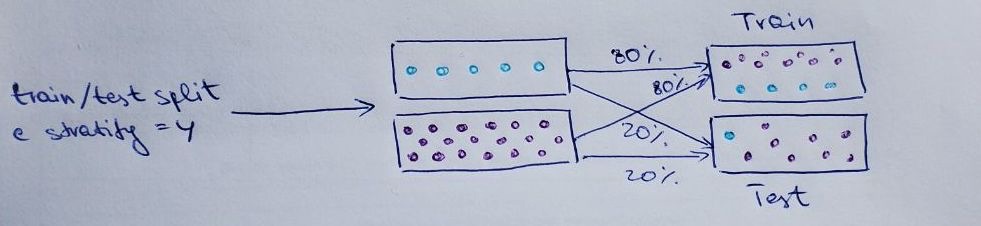
    
То есть, если соотношение классов в оригинальной выборке было 2:5, то в обучающей и валидационной выборках оно сохранится таким же. 
    
Такой подход в чем-то решает проблему несбалансированных классов, и нам не придется делать проверку состава выборок.

In [15]:
df_train_full, df_test = train_test_split(df, test_size=0.25, random_state=42)
df_train, df_valid = train_test_split(df_train_full, test_size=0.25, random_state=42)

Проверим что суммарные размеры выборок соответствуют исходным датафреймам

In [16]:
(len(df_train_full) + len(df_test)) == len(df)

True

In [17]:
(len(df_train) + len(df_valid)) == len(df_train_full)

True

В списке num_col сохраним названия числовых колонок, после чего проведем масштабирование данных колонок в обучающей, тестовой и валидационной выборках

In [18]:
num_col = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
scaler = StandardScaler()
scaler.fit(df_train[num_col])
df_train_scaled = df_train.copy()
df_train_scaled[num_col] = scaler.transform(df_train[num_col])
df_train_scaled.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Tenure_isna,Geography_Germany,Geography_Spain,Gender_Male
9865,-0.652682,0.958119,-0.499617,-1.218629,0.811846,1,0,-0.874352,0,0,0,0,1
7389,0.138195,-0.467101,0.145328,-1.218629,0.811846,1,0,1.101323,0,0,0,1,0
4739,-0.486182,-0.657130,0.467800,-1.218629,0.811846,0,0,1.661347,0,0,0,0,0
75,0.845823,-1.702291,-1.144562,1.642116,0.811846,1,0,-1.356258,0,0,0,0,0
8967,1.886451,-1.322232,0.790272,-1.218629,0.811846,1,1,-0.295305,0,0,0,0,1


In [19]:
df_valid_scaled = df_valid.copy()
df_valid_scaled[num_col] = scaler.transform(df_valid[num_col])
df_test_scaled = df_test.copy()
df_test_scaled[num_col] = scaler.transform(df_test[num_col])

Далее проведем обучение различных моделей на подготовленных данных

<div class="alert alert-success">
<h3> Комментарий ревьювера</h3>

Хочется похвалить за правильный структурный подход к данным:
- выполнено первичное исследование качества датасета
- удалены неинформативные переменные
- решена проблема с пропусками
- выполнена категоризация
- произведено разделение на выборки
- выполнено масштабирование признаков

👍🏻👍🏻👍🏻

### Логистическая регрессия

In [20]:
logistic_regression_model = LogisticRegression(random_state=42, solver='saga', penalty='l1')
logistic_regression_model.fit(df_train_scaled[x_col], df_train_scaled[y_col].values.ravel())
logistic_regression_predict = logistic_regression_model.predict(df_valid_scaled[x_col])

logistic_regression_f1_score = f1_score(df_valid_scaled[y_col], logistic_regression_predict)
logistic_regression_roc_auc_score = roc_auc_score(df_valid_scaled[y_col], logistic_regression_predict)
print('F1 мера на валидационной выбоке: {:.4f}'.format(logistic_regression_f1_score))
print('ROC AUC на валидационной выбоке: {:.4f}'.format(logistic_regression_roc_auc_score))

F1 мера на валидационной выбоке: 0.2734
ROC AUC на валидационной выбоке: 0.5719


### Случайный лес

In [21]:
best_forest_model = None
best_forest_depth = 0
best_forest_n_estimators = 0
best_forest_f1_score = 0
for n_estimators in tqdm(range (1, 51)):
    for depth in range(1, 21):
        model = RandomForestClassifier(n_estimators=n_estimators, max_depth=depth, random_state=42)
        model.fit(df_train_scaled[x_col], df_train_scaled[y_col].values.ravel())
        model_predict = model.predict(df_valid_scaled[x_col])
        if model_predict.sum() != 0:
            score = f1_score(df_valid_scaled[y_col], model_predict)
            if score > best_forest_f1_score:
                best_forest_model = model
                best_forest_depth = depth
                best_forest_n_estimators = n_estimators
                best_forest_f1_score = score

best_forest_roc_auc_score = roc_auc_score(df_valid_scaled[y_col], best_forest_model.predict(df_valid_scaled[x_col]))
print('F1 мера на валидационной выбоке: {:.4f}'.format(best_forest_f1_score), 'для деревьев глубиной', best_forest_depth)
print('Число деревьев:', best_forest_n_estimators)
print('ROC AUC на валидационной выбоке: {:.4f}'.format(best_forest_roc_auc_score))


F1 мера на валидационной выбоке: 0.5782 для деревьев глубиной 18
Число деревьев: 45
ROC AUC на валидационной выбоке: 0.7156


### k ближайших соседей

In [22]:
best_knn_model = None
best_n_neighbors = 0
best_knn_f1_score = 0
for n_neighbors in tqdm(range(1, 50)):
    knn_model = KNeighborsClassifier(n_neighbors=n_neighbors, weights='distance')
    knn_model.fit(df_train_scaled[x_col], df_train_scaled[y_col].values.ravel())
    knn_model_predict = knn_model.predict(df_valid_scaled[x_col])
    knn_f1_score = f1_score(df_valid_scaled[y_col], knn_model_predict)
    if knn_f1_score > best_knn_f1_score:
        best_knn_model = knn_model
        best_n_neighbors = n_neighbors
        best_knn_f1_score = knn_f1_score
        
best_knn_roc_auc_score = roc_auc_score(df_valid_scaled[y_col], best_knn_model.predict(df_valid_scaled[x_col]))

print('F1 мера на валидационной выбоке: {:.4f}'.format(best_knn_f1_score))
print('Для числа соседей:', best_n_neighbors)
print('ROC AUC на валидационной выбоке: {:.4f}'.format(best_knn_roc_auc_score))


F1 мера на валидационной выбоке: 0.5154
Для числа соседей: 4
ROC AUC на валидационной выбоке: 0.6873


### CatBoost

In [23]:
cat_boost_model = CatBoostClassifier(verbose=False, random_state=42, custom_metric='F1', 
                                    eval_metric='F1', iterations=200, learning_rate=0.11)
cat_boost_model.fit(df_train_scaled[x_col], df_train_scaled[y_col].values.ravel(),
                    eval_set=(df_valid_scaled[x_col], df_valid_scaled[y_col].values.ravel()))

cat_boost_f1_score = f1_score(df_valid_scaled[y_col], cat_boost_model.predict(df_valid_scaled[x_col]))
cat_boost_roc_auc_score = roc_auc_score(df_valid_scaled[y_col], cat_boost_model.predict(df_valid_scaled[x_col]))

print('F1 мера на валидационной выбоке: {:.4f}'.format(cat_boost_f1_score))
print('ROC AUC на валидационной выбоке: {:.4f}'.format(cat_boost_roc_auc_score))

F1 мера на валидационной выбоке: 0.6198
ROC AUC на валидационной выбоке: 0.7408


Из всех рассмотренных моделей только CatBoost на валидацонной выборке отвечает заданному критерию (F1-мера должна быть не менее 0,59). Попробуем улучшить качество модели путем комбинирования нескольких моделей

### Голосующая модель

In [24]:
# # ниже представлен код который переберает веса моделей и ищет наилучший голосующий классификатор по заданному критерию
# # так как перебор весов занимает порядка 30 мин код закомментирован.  
# # модель с уже найдеными весами представлена в следующей ячейке

# best_voiting_classifier = None
# best_voting_classifier_f1_score = 0
# best_weights = []
# for w0 in tqdm(np.arange(0,1.2,0.2)):
#     for w1 in np.arange(0,1.2,0.2):
#         for w2 in np.arange(0.2,1.2,0.2):
#             voting_classifier = VotingClassifier(estimators=[('lr', logistic_regression_model), 
#                                                              ('rf', best_forest_model), 
#                                                              ('cb', cat_boost_model)], 
#                                                  voting='soft', weights=[w0,w1,w2])

#             voting_classifier.fit(df_train_scaled[x_col], df_train_scaled[y_col].values.ravel())
#             voting_classifier_predict = voting_classifier.predict(df_valid_scaled[x_col])
#             voting_classifier_f1_score = f1_score(df_valid_scaled[y_col], voting_classifier_predict)
#             if voting_classifier_f1_score > best_voting_classifier_f1_score:
#                 best_voiting_classifier = voting_classifier
#                 best_voting_classifier_f1_score = voting_classifier_f1_score
#                 best_weights = [w0, w1, w2]
# print('F1 мера на валидационной выбоке: {:.4f}'.format(best_voting_classifier_f1_score))
# print('Веса моделей', best_weights)

In [25]:
best_voting_classifier = VotingClassifier(estimators=[('lr', logistic_regression_model), 
                                                      ('rf', best_forest_model), 
                                                      ('cb', cat_boost_model)], 
                                          voting='soft', weights=[0.0, 0.2, 0.8])

best_voting_classifier.fit(df_train_scaled[x_col], df_train_scaled[y_col].values.ravel());

In [26]:
voting_classifier_predict = best_voting_classifier.predict(df_valid_scaled[x_col])
voting_classifier_f1_score = f1_score(df_valid_scaled[y_col], voting_classifier_predict)
voting_classifier_roc_auc_score = roc_auc_score(df_valid_scaled[y_col], voting_classifier_predict)
print('F1 мера на валидационной выбоке: {:.4f}'.format(voting_classifier_f1_score))
print('ROC AUC на валидационной выбоке: {:.4f}'.format(voting_classifier_roc_auc_score))

F1 мера на валидационной выбоке: 0.6130
ROC AUC на валидационной выбоке: 0.7357


Голосующая модель удовлетворяет заданному требованию (F1-мера не менее 0,59) на валидационной выборке. Проверим как ведет себя модель на тестовой выборке

In [27]:
voting_classifier_predict = best_voting_classifier.predict(df_test_scaled[x_col])
voting_classifier_f1_score = f1_score(df_test_scaled[y_col], voting_classifier_predict)
voting_classifier_roc_auc_score = roc_auc_score(df_test_scaled[y_col], voting_classifier_predict)
print('F1 мера на тестовой выбоке: {:.4f}'.format(voting_classifier_f1_score))
print('ROC AUC на тестовой выбоке: {:.4f}'.format(voting_classifier_roc_auc_score))

F1 мера на тестовой выбоке: 0.5900
ROC AUC на тестовой выбоке: 0.7227


На тестовой выборке модель укладывается в заданные требования "в притык", что плохо. Основной причиной низкого качества модели является небаланс классов. Посмотрим на соотношение классов в исходном датафрейме

In [28]:
df['Exited'].value_counts(normalize=True)

0    0.7963
1    0.2037
Name: Exited, dtype: float64

Соотношение примерно 80/20. Попробуем улучшить модель применяя техники борьбы с дисбалансом.

<a id='section3'> </a>

# 3. Борьба с дисбалансом

## Upsampling 
Попробуем улучшить модель путем "генерации" большего числа строк класса "1"

In [29]:
def upsample(df, repeat):
    df_zeros = df[df['Exited'] == 0]
    df_ones = df[df['Exited'] == 1]
    df_upsampled = pd.concat([df_zeros] + [df_ones] * repeat)
    
    return shuffle(df_upsampled, random_state=42)

In [30]:
upsample(df, 4)['Exited'].value_counts(normalize=True)

1    0.505741
0    0.494259
Name: Exited, dtype: float64

In [31]:
df_train_upsampled = upsample(df_train_scaled, 4)

Обучим ранее рассмотренные модели на увеличенной выборке и оценим как изменились метрики

### Логистическая регрессия

In [32]:
logistic_regression_model = LogisticRegression(random_state=42, solver='saga', penalty='l1')
logistic_regression_model.fit(df_train_upsampled[x_col], df_train_upsampled[y_col].values.ravel())
logistic_regression_predict = logistic_regression_model.predict(df_valid_scaled[x_col])
logistic_regression_f1_score = f1_score(df_valid_scaled[y_col], logistic_regression_predict)
logistic_regression_roc_auc_score = roc_auc_score(df_valid_scaled[y_col], logistic_regression_predict)
print('F1 мера на валидационной выбоке: {:.4f}'.format(logistic_regression_f1_score))
print('ROC AUC на валидационной выбоке: {:.4f}'.format(logistic_regression_roc_auc_score))

F1 мера на валидационной выбоке: 0.4806
ROC AUC на валидационной выбоке: 0.6904


Применение увелечения выборки (Upsampling) позволило увеличить F1 меру для модели логистической регресии на валидационной выбоке с 0.2734 до 0.4806

### Случайный лес

In [33]:
best_forest_model = None
best_forest_depth = 0
best_forest_n_estimators = 0
best_forest_f1_score = 0
for n_estimators in tqdm(range (1, 51)):
    for depth in range(1, 21):
        model = RandomForestClassifier(n_estimators=n_estimators, max_depth=depth, random_state=42)
        model.fit(df_train_upsampled[x_col], df_train_upsampled[y_col].values.ravel())
        model_predict = model.predict(df_valid_scaled[x_col])
        if model_predict.sum() != 0:
            score = f1_score(df_valid_scaled[y_col], model_predict)
            if score > best_forest_f1_score:
                best_forest_model = model
                best_forest_depth = depth
                best_forest_n_estimators = n_estimators
                best_forest_f1_score = score

best_forest_roc_auc_score = roc_auc_score(df_valid_scaled[y_col], best_forest_model.predict(df_valid_scaled[x_col]))
print('F1 мера на валидационной выбоке: {:.4f}'.format(best_forest_f1_score), 'для деревьев глубиной', best_forest_depth)
print('Число деревьев:', best_forest_n_estimators)
print('ROC AUC на валидационной выбоке: {:.4f}'.format(best_forest_roc_auc_score))


F1 мера на валидационной выбоке: 0.6270 для деревьев глубиной 12
Число деревьев: 38
ROC AUC на валидационной выбоке: 0.7713


Применение увелечения выборки для модели случайного леса позволило несколько увеличить F1 меру на валидационной выбоке с 0.6130 до 0.6270

### k ближайших соседей

In [34]:
best_knn_model = None
best_n_neighbors = 0
best_knn_f1_score = 0
for n_neighbors in tqdm(range(1, 50)):
    knn_model = KNeighborsClassifier(n_neighbors=n_neighbors, weights='distance')
    knn_model.fit(df_train_upsampled[x_col], df_train_upsampled[y_col].values.ravel())
    knn_model_predict = knn_model.predict(df_valid_scaled[x_col])
    knn_f1_score = f1_score(df_valid_scaled[y_col], knn_model_predict)
    if knn_f1_score > best_knn_f1_score:
        best_knn_model = knn_model
        best_n_neighbors = n_neighbors
        best_knn_f1_score = knn_f1_score
        
best_knn_roc_auc_score = roc_auc_score(df_valid_scaled[y_col], best_knn_model.predict(df_valid_scaled[x_col]))

print('F1 мера на валидационной выбоке: {:.4f}'.format(best_knn_f1_score))
print('Для числа соседей:', best_n_neighbors)
print('ROC AUC на валидационной выбоке: {:.4f}'.format(best_knn_roc_auc_score))


F1 мера на валидационной выбоке: 0.5846
Для числа соседей: 49
ROC AUC на валидационной выбоке: 0.7738


Применение увелечения выборки для модели k случайных соседей позволило увеличить F1 меру на валидационной выбоке с 0.5154 до 0.5846

### CatBoost

In [35]:
cat_boost_model = CatBoostClassifier(verbose=False, random_state=42, custom_metric='F1', 
                                    eval_metric='F1', iterations=200, learning_rate=0.11)
cat_boost_model.fit(df_train_upsampled[x_col], df_train_upsampled[y_col].values.ravel(),
                    eval_set=(df_valid_scaled[x_col], df_valid_scaled[y_col].values.ravel()))

cat_boost_f1_score = f1_score(df_valid_scaled[y_col], cat_boost_model.predict(df_valid_scaled[x_col]))
cat_boost_roc_auc_score = roc_auc_score(df_valid_scaled[y_col], cat_boost_model.predict(df_valid_scaled[x_col]))

print('F1 мера на валидационной выбоке: {:.4f}'.format(cat_boost_f1_score))
print('ROC AUC на валидационной выбоке: {:.4f}'.format(cat_boost_roc_auc_score))

F1 мера на валидационной выбоке: 0.6203
ROC AUC на валидационной выбоке: 0.7908


Применение увелечения выборки для модели CatBoost привело к незначительному увеличению F1 меры на валидационной выбоке с 0.6198 до 0.6203

## Взвешивание классов

Второй путь борьбы с дисбаланосом классов - указание соответствующих параметров для каждой модели. Повторно рассмотрим уже знакомые нам модели

### Логистическая регрессия
Укажем параметр class_weight='balanced'

In [36]:
logistic_regression_model = LogisticRegression(random_state=42, solver='saga', penalty='l1', class_weight='balanced')
logistic_regression_model.fit(df_train_scaled[x_col], df_train_scaled[y_col].values.ravel())
logistic_regression_predict = logistic_regression_model.predict(df_valid_scaled[x_col])
logistic_regression_f1_score = f1_score(df_valid_scaled[y_col], logistic_regression_predict)
logistic_regression_roc_auc_score = roc_auc_score(df_valid_scaled[y_col], logistic_regression_predict)
print('F1 мера на валидационной выбоке: {:.4f}'.format(logistic_regression_f1_score))
print('ROC AUC на валидационной выбоке: {:.4f}'.format(logistic_regression_roc_auc_score))

F1 мера на валидационной выбоке: 0.4802
ROC AUC на валидационной выбоке: 0.6889


F1 мера для модели логистической регресии при взвешивании класов на валидационной выборке практически идентична мере при upsampling: 0.4802 и 0.4806

### Случайный лес
Укажем параметр class_weight='balanced'

In [37]:
best_forest_model = None
best_forest_depth = 0
best_forest_n_estimators = 0
best_forest_f1_score = 0
for n_estimators in tqdm(range (1, 51)):
    for depth in range(1, 21):
        model = RandomForestClassifier(n_estimators=n_estimators, max_depth=depth, random_state=42, class_weight='balanced')
        model.fit(df_train_scaled[x_col], df_train_scaled[y_col].values.ravel())
        model_predict = model.predict(df_valid_scaled[x_col])
        if model_predict.sum() != 0:
            score = f1_score(df_valid_scaled[y_col], model_predict)
            if score > best_forest_f1_score:
                best_forest_model = model
                best_forest_depth = depth
                best_forest_n_estimators = n_estimators
                best_forest_f1_score = score

best_forest_roc_auc_score = roc_auc_score(df_valid_scaled[y_col], best_forest_model.predict(df_valid_scaled[x_col]))
print('F1 мера на валидационной выбоке: {:.4f}'.format(best_forest_f1_score), 'для деревьев глубиной', best_forest_depth)
print('Число деревьев:', best_forest_n_estimators)
print('ROC AUC на валидационной выбоке: {:.4f}'.format(best_forest_roc_auc_score))


F1 мера на валидационной выбоке: 0.6252 для деревьев глубиной 10
Число деревьев: 23
ROC AUC на валидационной выбоке: 0.7666


F1 мера для модели случайного леса при взвешивании класов практически идентична мере при upsampling: 0.6252 и 0.6270

### CatBoost
Добавим гиперпараметр модели: scale_pos_weight=4

In [38]:
cat_boost_model = CatBoostClassifier(verbose=False, random_state=42, custom_metric='F1', 
                                    eval_metric='F1', iterations=100, scale_pos_weight=4, learning_rate=0.0619)
cat_boost_model.fit(df_train_scaled[x_col], df_train_scaled[y_col].values.ravel(),
                    eval_set=(df_valid_scaled[x_col], df_valid_scaled[y_col].values.ravel()))

cat_boost_f1_score = f1_score(df_valid_scaled[y_col], cat_boost_model.predict(df_valid_scaled[x_col]))
cat_boost_roc_auc_score = roc_auc_score(df_valid_scaled[y_col], cat_boost_model.predict(df_valid_scaled[x_col]))

print('F1 мера на валидационной выбоке: {:.4f}'.format(cat_boost_f1_score))
print('ROC AUC на валидационной выбоке: {:.4f}'.format(cat_boost_roc_auc_score))

F1 мера на валидационной выбоке: 0.6171
ROC AUC на валидационной выбоке: 0.7919


F1 мера для модели CatBoost при взвешивании класов практически идентична мере при upsampling: 0.6171 и 0.6203

### Голосующая модель
В качестве итоговой модели примем голосующую модель. В ней вероятности для классов которые предсказывают ранее проверенные по отдельности модели складываются с определенными весами. Такая модель должна быть более робастной и может несколько улучшить итоговую оценку

In [39]:
# # ниже представлен код который переберает веса моделей и ищет лучший голосующий классификатор
# # так как перебор весов занимает порядка 18 мин код закомментирован.  
# # модель с уже найдеными весами представлена в следующей ячейке

# best_voiting_classifier = None
# best_voting_classifier_f1_score = 0
# best_weights = []
# for w0 in tqdm(np.arange(0,1.2,0.2)):
#     for w1 in np.arange(0,1.2,0.2):
#         for w2 in np.arange(0.2,1.2,0.2):
#             voting_classifier = VotingClassifier(estimators=[('lr', logistic_regression_model), 
#                                                              ('rf', best_forest_model), 
#                                                              ('cb', cat_boost_model)], 
#                                                  voting='soft', weights=[w0,w1,w2])

#             voting_classifier.fit(df_train_scaled[x_col], df_train_scaled[y_col].values.ravel())
#             voting_classifier_predict = voting_classifier.predict(df_valid_scaled[x_col])
#             voting_classifier_f1_score = f1_score(df_valid_scaled[y_col], voting_classifier_predict)
#             if voting_classifier_f1_score > best_voting_classifier_f1_score:
#                 best_voiting_classifier = voting_classifier
#                 best_voting_classifier_f1_score = voting_classifier_f1_score
#                 best_weights = [w0, w1, w2]
# print('F1 мера на валидационной выбоке: {:.4f}'.format(best_voting_classifier_f1_score))
# print('Веса моделей', best_weights)

In [40]:
best_voting_classifier = VotingClassifier(estimators=[('lr', logistic_regression_model), 
                                                      ('rf', best_forest_model), 
                                                      ('cb', cat_boost_model)], 
                                          voting='soft', weights=[0.2, 0.6, 1.0])

best_voting_classifier.fit(df_train_scaled[x_col], df_train_scaled[y_col].values.ravel());

In [41]:
voting_classifier_predict = best_voting_classifier.predict(df_valid_scaled[x_col])
voting_classifier_f1_score = f1_score(df_valid_scaled[y_col], voting_classifier_predict)
voting_classifier_roc_auc_score = roc_auc_score(df_valid_scaled[y_col], voting_classifier_predict)
print('F1 мера на валидационной выбоке: {:.4f}'.format(voting_classifier_f1_score))
print('ROC AUC на валидационной выбоке: {:.4f}'.format(voting_classifier_roc_auc_score))

F1 мера на валидационной выбоке: 0.6304
ROC AUC на валидационной выбоке: 0.7903


F1 мера на валидационной выбоке для итоговой модели составила 0.6304, что соответствует заданному критерию (не менее 0.59). Проверим как работает модель на тестовой выборке.

<div class="alert alert-success">
<h3> Комментарий ревьювера</h3>

Этап выполнен корректно 👍🏻
    
Здорово, что ты попробовал целых 5 моделей.

<a id='section4'> </a>

# 4. Тестирование модели

<div class="alert alert-warning">
<h3>Комментарий ревьюера</h3>

Предлагаю в будущем попробовать еще один метод :)
    
Есть два базовых способа, как протестировать модель:
    
1. Обучаем модель на train -> проверяем на valid -> результат удовлетворительный -> проверяем на test
2. Обучаем модель на train -> проверяем на valid -> результат удовлетворительный -> соединить train и valid (Без стандартизации, просто делаем merge наших уже стандартизированных датафреймов.) -> если лучшую модель мы получили, используя, например, upsampling, то такой же метод мы применяем на нашу новые данные train+valid -> обучаем модель со старыми лучшими параметрами -> проверяем на test
    
Так как наша задача здесь не просто тупо проверить вашу работу, а попытаться поделиться практическим опытом, я хотела, чтобы ты попробовал оба способа. Первый способ допустим, но нам нужно до вас донести и второй :)
   
Он жестче, чем первый. Наша модель хорошо себя повела, и по идее если соединить train и valid (не изменяя параметры стандартизации, так как именно с нашим изначальным масштабированием модель была эффективной), сохранить все условия обучения и переобучить ее на этих данных, то результат должен быть не хуже или даже чуть лучше. Если мы получили какое-то сильное ухудшение качества, нужно подумать, а настолько ли хороша модель. Мы ведь никаких кардинальный изменений не сделали. Данные ведь почти те же самые.
</div>

In [42]:
voting_classifier_predict = best_voting_classifier.predict(df_test_scaled[x_col])
voting_classifier_f1_score = f1_score(df_test_scaled[y_col], voting_classifier_predict)
voting_classifier_roc_auc_score = roc_auc_score(df_test_scaled[y_col], voting_classifier_predict)
print('F1 мера на тестовой выбоке: {:.4f}'.format(voting_classifier_f1_score))
print('ROC AUC на тестовой выбоке: {:.4f}'.format(voting_classifier_roc_auc_score))

F1 мера на тестовой выбоке: 0.6310
ROC AUC на тестовой выбоке: 0.7941


F1 мера на валидационной и тестовой выборке отличается незначительно (0,06%), что может говорить о стабильной работе алгоритма.

### Проверка модели на адекватность

In [43]:
dummy_classifier = DummyClassifier(random_state=42, strategy='constant', constant=[1])
dummy_classifier.fit(df_train_scaled[x_col], df_train_scaled[y_col].values.ravel())
dummy_classifier_predict = dummy_classifier.predict(df_test_scaled[x_col])
dummy_classifier_f1_score = f1_score(df_test_scaled[y_col], dummy_classifier_predict)
dummy_classifier_roc_auc_score = roc_auc_score(df_test_scaled[y_col], dummy_classifier_predict)
print('F1 мера : {:.4f}'.format(dummy_classifier_f1_score))
print('ROC AUC : {:.4f}'.format(dummy_classifier_roc_auc_score))

F1 мера : 0.3317
ROC AUC : 0.5000


Константная модель дает F1 меру 0.3317, итоговая модель на тестовой выборке 0.6310, что говорит об адекватности модели

<a id='section5'> </a>

# Выводы

1. В работе была оценена возможность использования следующих алгоритмов:
    * дерево решений
    * случайный лес
    * k ближвйших соседей
    * логистическая регрессия
    * CatBoost
    
* Оптимизированы параметры алгоритмов
* Проработано два варианта балансировки выборки:
    * upsampling
    * взвешивание классов
  
  Оба подхода дают близкую F1 меру для одной и той же модели на одних и тех же данных. Оба подхода дают выйгрыш по сравнению с подходом когда небаланс классов не учитывается
  
* Предложено решающее правило по которому сформирована итоговая модель
* Проведена оценка F1 меры и ROC AUC для каждой из рассмотренных моделей
* Итоговая модель имеет F1 меру на тестовой выборке 63,1 % и ROC AUC - 0,79

<div class="alert alert-success">
<h3> Комментарий ревьювера</h3>

Огонь, отличная работа 🔥

# Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: задача исследована
    - [x]  Исследован баланс классов
    - [x]  Изучены модели без учёта дисбаланса
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 3: учтён дисбаланс
    - [x]  Применено несколько способов борьбы с дисбалансом
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 4: проведено тестирование
- [x]  Удалось достичь *F1*-меры не менее 0.59
- [x]  Исследована метрика *AUC-ROC*